### **Network Analysis**

In [2]:
# Setup
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [3]:
# Upload all data files - must be on local computer
# Friends.csv, Follows.csv, Dolphins.csv
# If running notebook on local computer:
#   No need to run this cell (it will generate an error)
#   Make sure data files are in same workspace as notebook
from google.colab import files
uploaded = files.upload()

Saving Follows.csv to Follows.csv
Saving Dolphins.csv to Dolphins.csv
Saving Friends.csv to Friends.csv


### Undirected graph (Friends)

In [4]:
# Load graph from CSV file with no header
f = open('Friends.csv')
G = nx.read_edgelist(f, delimiter=',', nodetype=str)
print('Loaded graph with', G.number_of_nodes(), 'nodes and', G.number_of_edges(), 'edges')

Loaded graph with 10 nodes and 15 edges


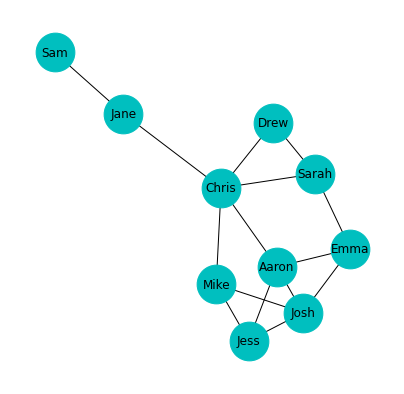

In [12]:
# Print graph
# First two lines size drawing for Jupyter notebook
# Note layout differs each time
plt.figure(figsize=(7,7))
plt.margins(x=0.1, y=0.1)
nx.draw(G, with_labels=True, node_size=1500, node_color='c')

In [14]:
# Density of graph (see what's wrong and fix it)
poss_edges = G.number_of_nodes() * (G.number_of_nodes()-1) / 2
print('Possible edges:', poss_edges)
print('Actual edges:', G.number_of_edges())
print('Density:', G.number_of_edges()/poss_edges)
# Using built-in function
print('Using density function:', nx.density(G))

Possible edges: 45.0
Actual edges: 15
Density: 0.3333333333333333
Using density function: 0.3333333333333333


In [15]:
# Diameter and overall average shortest distance
print('Diameter:', nx.diameter(G))
print('Average shortest distance:', nx.average_shortest_path_length(G))

Diameter: 4
Average shortest distance: 2.022222222222222


In [16]:
# Maximal cliques
cliques = nx.find_cliques(G) # cliques is iterator
for c in cliques:
    print(c)
# Try print cliques
# Modify code to only print cliques > 2

['Sam', 'Jane']
['Emma', 'Aaron', 'Josh']
['Emma', 'Sarah']
['Josh', 'Jess', 'Aaron']
['Josh', 'Jess', 'Mike']
['Chris', 'Aaron']
['Chris', 'Sarah', 'Drew']
['Chris', 'Mike']
['Chris', 'Jane']


In [17]:
# Iterating through nodes of the graph
for n in G:
    print(n)

Aaron
Chris
Emma
Josh
Drew
Jane
Jess
Mike
Sarah
Sam


In [19]:
# Number of friends -'degree' is number of edges incident on a node
numfriends = G.degree
print(numfriends)
# for n in numfriends:
#    print(n[0], 'has', n[1], 'friends')
# Or can treat list of pairs like a dictionary
for n in G:
   print(n, 'has', numfriends[n], 'friends')

[('Aaron', 4), ('Chris', 5), ('Emma', 3), ('Josh', 4), ('Drew', 2), ('Jane', 2), ('Jess', 3), ('Mike', 3), ('Sarah', 3), ('Sam', 1)]
Aaron has 4 friends
Chris has 5 friends
Emma has 3 friends
Josh has 4 friends
Drew has 2 friends
Jane has 2 friends
Jess has 3 friends
Mike has 3 friends
Sarah has 3 friends
Sam has 1 friends


In [21]:
G.degree('Aaron')

4

In [20]:
# Friends lists
for n in G:
    print(n, 'has friends:')
    friends = G.neighbors(n) # friends is iterator
    for f in friends:
        print(' ', f)

Aaron has friends:
  Chris
  Emma
  Josh
  Jess
Chris has friends:
  Aaron
  Drew
  Jane
  Mike
  Sarah
Emma has friends:
  Aaron
  Josh
  Sarah
Josh has friends:
  Aaron
  Emma
  Jess
  Mike
Drew has friends:
  Chris
  Sarah
Jane has friends:
  Chris
  Sam
Jess has friends:
  Aaron
  Josh
  Mike
Mike has friends:
  Chris
  Josh
  Jess
Sarah has friends:
  Drew
  Chris
  Emma
Sam has friends:
  Jane


In [22]:
# Friends lists v2
for n in G:
    print(n, 'has friends:', list(G.neighbors(n)))

Aaron has friends: ['Chris', 'Emma', 'Josh', 'Jess']
Chris has friends: ['Aaron', 'Drew', 'Jane', 'Mike', 'Sarah']
Emma has friends: ['Aaron', 'Josh', 'Sarah']
Josh has friends: ['Aaron', 'Emma', 'Jess', 'Mike']
Drew has friends: ['Chris', 'Sarah']
Jane has friends: ['Chris', 'Sam']
Jess has friends: ['Aaron', 'Josh', 'Mike']
Mike has friends: ['Chris', 'Josh', 'Jess']
Sarah has friends: ['Drew', 'Chris', 'Emma']
Sam has friends: ['Jane']


In [25]:
# Closeness centrality - average shortest distance to other nodes, normalized on reverse 0-1 scale
cc = nx.closeness_centrality(G)
# print(cc)
sorted_keys = sorted(cc, key=cc.get, reverse=True)
print(sorted_keys)
for k in sorted_keys:
   print(k, 'has closeness centrality', cc[k])

['Chris', 'Aaron', 'Mike', 'Sarah', 'Emma', 'Josh', 'Drew', 'Jane', 'Jess', 'Sam']
Chris has closeness centrality 0.6923076923076923
Aaron has closeness centrality 0.6
Mike has closeness centrality 0.5625
Sarah has closeness centrality 0.5294117647058824
Emma has closeness centrality 0.5
Josh has closeness centrality 0.5
Drew has closeness centrality 0.47368421052631576
Jane has closeness centrality 0.47368421052631576
Jess has closeness centrality 0.45
Sam has closeness centrality 0.3333333333333333


In [26]:
# Betweenness centrality - number of shortest paths it's on, normalized on 0-1 scale
bc = nx.betweenness_centrality(G)
sorted_keys = sorted(bc, key=bc.get, reverse=True)
for k in sorted_keys:
    print(k, 'has betweenness centrality', bc[k])

Chris has betweenness centrality 0.5555555555555556
Jane has betweenness centrality 0.2222222222222222
Aaron has betweenness centrality 0.1759259259259259
Mike has betweenness centrality 0.11342592592592592
Sarah has betweenness centrality 0.0787037037037037
Emma has betweenness centrality 0.0648148148148148
Josh has betweenness centrality 0.05787037037037036
Jess has betweenness centrality 0.009259259259259259
Drew has betweenness centrality 0.0
Sam has betweenness centrality 0.0


### Directed graph (Followers)

In [27]:
# Load graph from CSV file with no header
f = open('Follows.csv')
D = nx.read_edgelist(f, delimiter=',', nodetype=str, create_using=nx.DiGraph())
print('Loaded graph with', D.number_of_nodes(), 'nodes and', D.number_of_edges(), 'edges')

Loaded graph with 10 nodes and 18 edges


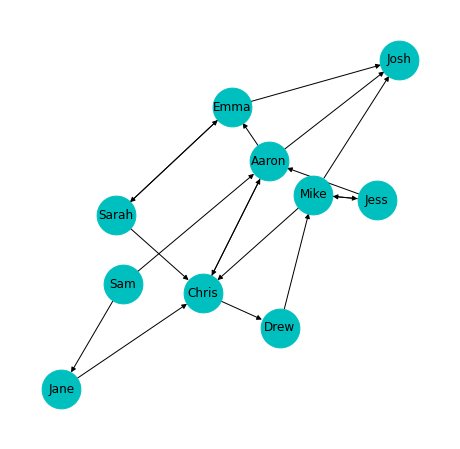

In [31]:
plt.figure(figsize=(8,8))
plt.margins(x=0.1, y=0.1)
nx.draw(D, with_labels=True, node_size=1500, arrows=True, node_color='c')

In [33]:
# Number of follows and followers
follows = D.out_degree
followers = D.in_degree
print('Number of follows: ', follows)
print('Number of followers: ', followers)
# Can treat list of pairs like a dictionary
for n in D:
   print(n, 'follows', follows[n], 'and has', followers[n], 'followers')

Number of follows:  [('Aaron', 3), ('Chris', 2), ('Emma', 2), ('Josh', 0), ('Drew', 1), ('Mike', 3), ('Sarah', 2), ('Jane', 1), ('Jess', 2), ('Sam', 2)]
Number of followers:  [('Aaron', 3), ('Chris', 4), ('Emma', 2), ('Josh', 3), ('Drew', 1), ('Mike', 2), ('Sarah', 1), ('Jane', 1), ('Jess', 1), ('Sam', 0)]
Aaron follows 3 and has 3 followers
Chris follows 2 and has 4 followers
Emma follows 2 and has 2 followers
Josh follows 0 and has 3 followers
Drew follows 1 and has 1 followers
Mike follows 3 and has 2 followers
Sarah follows 2 and has 1 followers
Jane follows 1 and has 1 followers
Jess follows 2 and has 1 followers
Sam follows 2 and has 0 followers


In [36]:
# Reciprocity - people that follow each other (see what's wrong and fix it)
for n in D:
#    print(n, list(D.neighbors(n)))
   for n2 in list(D.neighbors(n)):
       if n in list(D.neighbors(n2)) and n < n2:
           print(n, 'and', n2, 'follow each other')

Aaron and Chris follow each other
Emma and Sarah follow each other
Jess and Mike follow each other


In [37]:
# Cycles
cycles = nx.simple_cycles(D)
for c in cycles:
    print(c)

['Mike', 'Jess']
['Mike', 'Jess', 'Aaron', 'Emma', 'Sarah', 'Chris', 'Drew']
['Mike', 'Jess', 'Aaron', 'Chris', 'Drew']
['Mike', 'Chris', 'Drew']
['Aaron', 'Emma', 'Sarah', 'Chris']
['Aaron', 'Chris']
['Emma', 'Sarah']


In [38]:
# Alternative reciprocity
cycles = nx.simple_cycles(D)
for c in cycles:
    if len(c) == 2:
        print(c[0], 'and', c[1], 'follow each other')

Mike and Jess follow each other
Aaron and Chris follow each other
Emma and Sarah follow each other


### <font color="green">**Your Turn: Dolphins Data**</font>

Loaded graph with 62 nodes and 159 edges


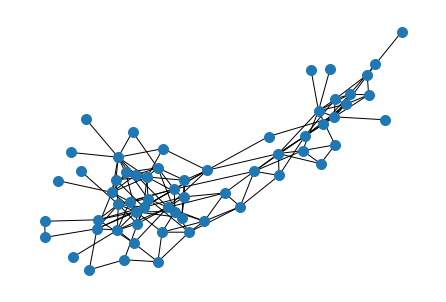

In [39]:
# Load the dolphin friends data and print the graph
f = open('Dolphins.csv')
G = nx.read_edgelist(f, delimiter=',', nodetype=str)
print('Loaded graph with', G.number_of_nodes(), 'nodes and', G.number_of_edges(), 'edges')
nx.draw(G, node_size=100)

<b>Friendliest dolphin:</b><br><i>Find the dolphin with the most friends. Don't worry about ties - there's one who's the friendliest. Print the dolphin's identifier and the number of friends the dolphin has.</i>

In [46]:
# Reminder: G.degree returns a list with the number of edges incident on each node
# Hint: Iterate through the G.degree list keeping track of the dolphin with the most
# friends, and how many friends it has
friendliest = 0
maxnumfriends = 0
numfriends = G.degree
for (dolphin, numfriend) in numfriends:
  if numfriend > maxnumfriends:
    maxnumfriends = numfriend
    friendliest = dolphin
print(f'Dolphin {friendliest} is the most friendliest with {maxnumfriends} friends')

Dolphin 15 is the most friendliest with 12 friends


<b>Dolphin friend recommendation, a type of "link prediction":</b><br>
<i>Find all pairs of dolphins who are not friends but have at least four friends in common. Print each pair only once, and include a list of the friends they have in common.</i>

In [49]:
# The following code finds the common friends of all pairs of dolphins in the graph
# (without eliminating self-pairs or reverse-pairs).
# You can use it as a starting point for solving the problem.
for n1 in G:
    for n2 in G:
        if n2 not in list(G.neighbors(n1)) and n1 < n2:
          common = set(G.neighbors(n1)) & set(G.neighbors(n2)) # performs intersection of two lists
          if len(list(common)) >= 4:
            print('Dolphins', n1, 'and', n2, 'have friends', list(common), 'in common')

Dolphins 6 and 7 have friends ['10', '57', '14', '58'] in common
Dolphins 10 and 55 have friends ['42', '14', '58', '7'] in common
Dolphins 16 and 52 have friends ['25', '56', '19', '46'] in common
Dolphins 17 and 44 have friends ['15', '38', '34', '39'] in common
Dolphins 18 and 42 have friends ['10', '2', '14', '58'] in common
Dolphins 18 and 55 have friends ['14', '2', '58', '7'] in common
Dolphins 22 and 25 have friends ['46', '30', '19', '52'] in common
Dolphins 38 and 39 have friends ['15', '44', '34', '17'] in common
Dolphins 38 and 51 have friends ['15', '34', '46', '17'] in common
Dolphins 39 and 51 have friends ['15', '21', '34', '17'] in common
Dolphins 42 and 7 have friends ['10', '55', '14', '58'] in common
